# Data Analyzation for Madrid's neighborhoods

#### Introduction

Our Client requested a data analyzation project from our firm. With a possibility of opening a new coffee shop in Madrid, we will to investigate which would be the best neighborhood in Madrid for this local.

Installing all the necessary libraries for this project.

In [1]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

     |████████████████████████████████| 98 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 94 kB 6.9 MB/s  eta 0:00:01
All libraries imported.


I am using data from a Wikipedia source where the neighborhoods in Madrid are listed. Scraping data from the following link: https://en.wikipedia.org/wiki/Districts_of_Madrid

In [5]:
df = pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Madrid')[-1]
df.rename(columns={'.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid': 'Neighborhood'}, inplace=True)
df.head(10)

,Neighborhood,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.1",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.2"
0,Arganzuela,Atocha Imperial La Chopera Las Acacias Las Del...,NaN
1,Barajas,Aeropuerto Alameda de Osuna Casco Histórico de...,NaN
2,Carabanchel,Abrantes Buenavista Comillas Opañel Puerta Bon...,NaN
3,Centro,Cortes Embajadores Justicia Universidad Palaci...,NaN
4,Chamartín,Castilla Ciudad Jardín El Viso Hispanoamérica ...,NaN
5,Chamberí,Almagro Arapiles Gaztambide Ríos Rosas Trafalg...,NaN
6,Ciudad Lineal,Atalaya Colina Concepción Pinar de Chamartín P...,NaN
7,Fuencarral-El Pardo,Barrio del Pilar El Goloso El Pardo Fuentelarr...,NaN
8,Hortaleza,Apóstol Santiago Canillas Palomas Pinar del Re...,NaN
9,Latina,Aluche Campamento Cuatro Vientos Las Águilas L...,NaN


In [15]:
df['Latitude'] = None
df['Longitude'] = None

for i, neigh in enumerate(df['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Madrid, '.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df.loc[i, 'Latitude'] = latitude
    df.loc[i, 'Longitude'] = longitude

In [14]:
df.head(10)

,Neighborhood,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.1",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.2",Latitude1,Longitude1,Latitude,Longitude
0,Arganzuela,Atocha Imperial La Chopera Las Acacias Las Del...,NaN,40.4002,-3.69618,40.4002,-3.69618
1,Barajas,Aeropuerto Alameda de Osuna Casco Histórico de...,NaN,40.4918,-3.56948,40.4918,-3.56948
2,Carabanchel,Abrantes Buenavista Comillas Opañel Puerta Bon...,NaN,40.3909,-3.7242,40.3909,-3.7242
3,Centro,Cortes Embajadores Justicia Universidad Palaci...,NaN,41.6281,-4.72705,41.6281,-4.72705
4,Chamartín,Castilla Ciudad Jardín El Viso Hispanoamérica ...,NaN,40.45,-3.7,40.45,-3.7
5,Chamberí,Almagro Arapiles Gaztambide Ríos Rosas Trafalg...,NaN,40.434,-3.70379,40.434,-3.70379
6,Ciudad Lineal,Atalaya Colina Concepción Pinar de Chamartín P...,NaN,40.4535,-3.65434,40.4535,-3.65434
7,Fuencarral-El Pardo,Barrio del Pilar El Goloso El Pardo Fuentelarr...,NaN,40.4984,-3.7314,40.4984,-3.7314
8,Hortaleza,Apóstol Santiago Canillas Palomas Pinar del Re...,NaN,40.4744,-3.6411,40.4744,-3.6411
9,Latina,Aluche Campamento Cuatro Vientos Las Águilas L...,NaN,40.389,-3.74569,40.389,-3.74569


In [16]:
df.drop(['.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.1', '.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.2'], axis=1)

,Neighborhood,Latitude1,Longitude1,Latitude,Longitude
0,Arganzuela,40.4002,-3.69618,40.4002,-3.69618
1,Barajas,40.4918,-3.56948,40.4918,-3.56948
2,Carabanchel,40.3909,-3.7242,40.3909,-3.7242
3,Centro,41.6281,-4.72705,-22.5442,-44.1745
4,Chamartín,40.45,-3.7,40.45,-3.7
5,Chamberí,40.434,-3.70379,40.434,-3.70379
6,Ciudad Lineal,40.4535,-3.65434,40.4535,-3.65434
7,Fuencarral-El Pardo,40.4984,-3.7314,40.4984,-3.7314
8,Hortaleza,40.4744,-3.6411,40.4744,-3.6411
9,Latina,40.389,-3.74569,40.389,-3.74569


In [30]:
#lets visualize the neighborhoods on a map using Folium. First we will obtain the geographical coordinates


address = 'Madrid, ES'
geolocator = Nominatim(user_agent="smy-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Madrid are 40.4167047, -3.7035825.


#### Showing Madrid and its neighborhoods on the map with the help of Folium

In [35]:
map_mad = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3180cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mad)  
    
map_mad

## Using Foursquare API

Creating the Foursquare credentials.

In [36]:
CLIENT_ID = 'WGVEXICDOQMRJWU3XYUM30NWEJTGDWLVDULGZEUVNTFSYWUN' # your Foursquare ID
CLIENT_SECRET = '4TVC5OA1CDVS5QUBYE1YBBJMYDB1TDSDTDCJ5ANQ1R0TJMTN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WGVEXICDOQMRJWU3XYUM30NWEJTGDWLVDULGZEUVNTFSYWUN
CLIENT_SECRET:4TVC5OA1CDVS5QUBYE1YBBJMYDB1TDSDTDCJ5ANQ1R0TJMTN


In [37]:
neighborhood_name = df.loc[0, 'Neighborhood']
neighborhood_lat = df.loc[0, 'Latitude']
neighborhood_long = df.loc[0, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Arganzuela and it's geographical coordinates are 40.40021000000007 latitude and -3.69617999999997 longitude


Extracting the top 50 venues near Arganzuela.

In [38]:
#extracing the top 50 venues near Arganzuela and with a radius of 1000 m.

LIMIT = 50
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6003220518aab40723c2791b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Delicias',
  'headerFullLocation': 'Delicias, Madrid',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 154,
  'suggestedBounds': {'ne': {'lat': 40.409210009000084,
    'lng': -3.6843838331018315},
   'sw': {'lat': 40.39120999100006, 'lng': -3.707976166898108}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '505b8827e4b027981a3cedc4',
       'name': 'Havana Blues',
       'location': {'address': 'Santa María de la Cabeza 56',
        'crossStreet': 'Bernardo Obregon',
        'lat': 40.40205019041982,
        'lng': -3.698488323598797,
        'labeledLa

In [40]:
#create a function get_category_type to extract the categories of venues.

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
#clean the JSON obtained using the GET method and store our results in a dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Havana Blues,Cuban Restaurant,40.402050,-3.698488
1,La Pequeña Graná,Tapas Restaurant,40.399574,-3.698550
2,Museo del Ferrocarril (Antigua Estación de Del...,Museum,40.399395,-3.692286
3,Tres Cerditos,Chinese Restaurant,40.397316,-3.694184
4,Salón de Té Al Yabal,Cocktail Bar,40.399015,-3.700249


In [42]:
#check how many venues were returned by Foursquare

print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), neighborhood_name))


50 venues were returned for Arganzuela by Foursquare


In [43]:
#we can generalize this procedure to get nearby venues for all neighborhoods in Madrid

def getNearbyVenues(names, latitudes, longitudes, radius=500):   
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
mad_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)

Arganzuela
Barajas
Carabanchel
Centro
Chamartín
Chamberí
Ciudad Lineal
Fuencarral-El Pardo
Hortaleza
Latina
Moncloa-Aravaca
Moratalaz
Puente de Vallecas
Retiro
Salamanca
San Blas-Canillejas
Tetuán
Usera
Vicálvaro
Villa de Vallecas
Villaverde


In [45]:
print(mad_venues.shape)
mad_venues.head(10)

(792, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arganzuela,40.40021,-3.69618,Havana Blues,40.402050,-3.698488,Cuban Restaurant
1,Arganzuela,40.40021,-3.69618,La Pequeña Graná,40.399574,-3.698550,Tapas Restaurant
2,Arganzuela,40.40021,-3.69618,Museo del Ferrocarril (Antigua Estación de Del...,40.399395,-3.692286,Museum
3,Arganzuela,40.40021,-3.69618,Tres Cerditos,40.397316,-3.694184,Chinese Restaurant
4,Arganzuela,40.40021,-3.69618,Salón de Té Al Yabal,40.399015,-3.700249,Cocktail Bar
5,Arganzuela,40.40021,-3.69618,Mercado de Motores,40.399149,-3.691978,Flea Market
6,Arganzuela,40.40021,-3.69618,Mercado de Santa María de la Cabeza,40.402860,-3.696819,Farmers Market
7,Arganzuela,40.40021,-3.69618,Pui Thai Tapas,40.404475,-3.696692,Thai Restaurant
8,Arganzuela,40.40021,-3.69618,El Quinto Pecado,40.400028,-3.694446,Gastropub
9,Arganzuela,40.40021,-3.69618,Garaje Lumiere,40.400047,-3.695005,Movie Theater


In [46]:
mad_venues.groupby('Neighborhood', as_index=False).count()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arganzuela,50,50,50,50,50,50
1,Barajas,18,18,18,18,18,18
2,Carabanchel,39,39,39,39,39,39
3,Centro,50,50,50,50,50,50
4,Chamartín,50,50,50,50,50,50
5,Chamberí,50,50,50,50,50,50
6,Ciudad Lineal,50,50,50,50,50,50
7,Fuencarral-El Pardo,6,6,6,6,6,6
8,Hortaleza,40,40,40,40,40,40
9,Latina,41,41,41,41,41,41


In [48]:
print("There are {} unique categories".format(mad_venues['Venue Category'].nunique()))

There are 162 unique categories


# Analyzing each neighborhood


In [49]:
mad_onehot = pd.get_dummies(mad_venues[['Venue Category']], prefix="", prefix_sep="")
mad_onehot.head()

,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,...,Toy / Game Store,Trade School,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
mad_onehot['Neighborhood'] = mad_venues['Neighborhood']
mad_onehot.head()

,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,...,Toy / Game Store,Trade School,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
temp = list(mad_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
mad_onehot = mad_onehot[fixed_columns]

mad_onehot.head()

,Neighborhood,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Toy / Game Store,Trade School,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Yoga Studio
0,Arganzuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arganzuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arganzuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arganzuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arganzuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
mad_grouped = mad_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(mad_grouped.shape)
mad_grouped.head(10)

(21, 162)


,Neighborhood,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Toy / Game Store,Trade School,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Yoga Studio
0,Arganzuela,0.000000,0.000000,0.00,0.000,0.08,0.04,0.000,0.00000,0.00,...,0.00000,0.02,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
1,Barajas,0.277778,0.055556,0.00,0.000,0.00,0.00,0.000,0.00000,0.00,...,0.00000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
2,Carabanchel,0.000000,0.000000,0.00,0.000,0.00,0.00,0.000,0.00000,0.00,...,0.00000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
3,Centro,0.000000,0.000000,0.00,0.000,0.00,0.00,0.000,0.00000,0.00,...,0.00000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
4,Chamartín,0.000000,0.000000,0.00,0.000,0.02,0.00,0.000,0.00000,0.00,...,0.00000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.02
5,Chamberí,0.000000,0.000000,0.02,0.000,0.00,0.00,0.000,0.00000,0.02,...,0.00000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
6,Ciudad Lineal,0.000000,0.000000,0.00,0.060,0.00,0.00,0.020,0.02000,0.00,...,0.00000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
7,Fuencarral-El Pardo,0.000000,0.000000,0.00,0.000,0.00,0.00,0.000,0.00000,0.00,...,0.00000,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.00
8,Hortaleza,0.000000,0.000000,0.00,0.025,0.00,0.00,0.025,0.00000,0.00,...,0.00000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
9,Latina,0.000000,0.000000,0.00,0.000,0.00,0.00,0.000,0.02439,0.00,...,0.02439,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00


In [54]:
num_top_venues = 5

for hood in mad_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mad_grouped[mad_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arganzuela----
                venue  freq
0         Art Gallery  0.08
1          Restaurant  0.06
2    Tapas Restaurant  0.06
3  Spanish Restaurant  0.06
4  Chinese Restaurant  0.04


----Barajas----
                 venue  freq
0       Airport Lounge  0.28
1   Spanish Restaurant  0.17
2  Sporting Goods Shop  0.11
3          Coffee Shop  0.11
4      Airport Service  0.06


----Carabanchel----
                  venue  freq
0                   Bar  0.13
1                 Plaza  0.08
2  Gym / Fitness Center  0.08
3  Fast Food Restaurant  0.05
4      Tapas Restaurant  0.05


----Centro----
                venue  freq
0              Bakery  0.14
1  Italian Restaurant  0.06
2                 Gym  0.06
3                Café  0.06
4         Pizza Place  0.06


----Chamartín----
                 venue  freq
0   Spanish Restaurant  0.08
1               Bakery  0.06
2                Hotel  0.06
3  Japanese Restaurant  0.06
4                  Pub  0.04


----Chamberí----
                venue

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mad_grouped['Neighborhood']

for ind in np.arange(mad_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mad_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arganzuela,Art Gallery,Spanish Restaurant,Restaurant,Tapas Restaurant,Coffee Shop
1,Barajas,Airport Lounge,Spanish Restaurant,Sporting Goods Shop,Coffee Shop,Diner
2,Carabanchel,Bar,Plaza,Gym / Fitness Center,Bakery,Concert Hall
3,Centro,Bakery,Italian Restaurant,Gym,Café,Pizza Place
4,Chamartín,Spanish Restaurant,Hotel,Bakery,Japanese Restaurant,Thai Restaurant
5,Chamberí,Tapas Restaurant,Restaurant,Ice Cream Shop,Café,Spanish Restaurant
6,Ciudad Lineal,Spanish Restaurant,Hotel,Argentinian Restaurant,Chinese Restaurant,Supermarket
7,Fuencarral-El Pardo,Dog Run,Spanish Restaurant,Metro Station,Train Station,Park
8,Hortaleza,Spanish Restaurant,Supermarket,Sandwich Place,Restaurant,Soccer Field
9,Latina,Fast Food Restaurant,Grocery Store,Bakery,Pizza Place,Restaurant


# Clustering neighborhoods

In [58]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [61]:
maxk = 20
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = mad_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=20).fit_predict(cl_df)
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

[0.3484098626051849, 0.07844534649530847, 0.09093165552485634, 0.07233131233765581, 0.07267138121238888, 0.055149582994987435, 0.03966729303612332, 0.03100756235054248, 0.03241956018938884, 0.04812965584503199, 0.06216549564169137, 0.06326345381434788, 0.04540841431927463, 0.05231812432216774, 0.046583383882247524, 0.03741727164924819, 0.025275726529197576, 0.01816980783774795, 0.013090833521886672]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


<IPython.core.display.Javascript object>


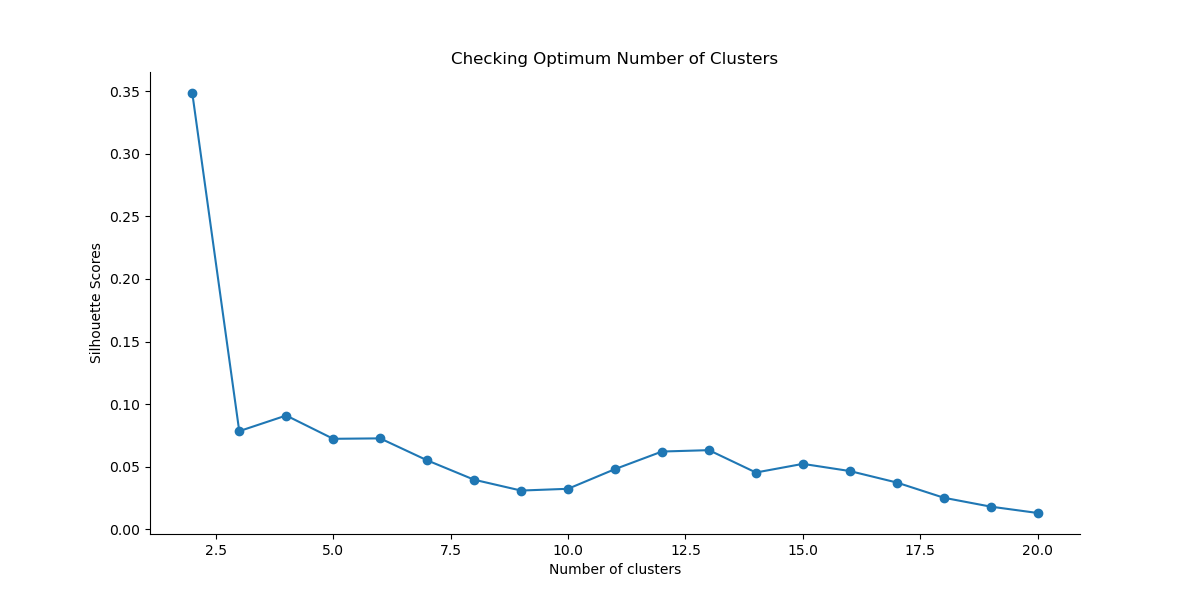

In [62]:
print(scores)
print(kval)
plot(kval, scores)

Looks like the highest silhouette score is 2. Just for the sake of clustering we will cluster in 4 parts as after the 2 this is the highest one.

In [63]:
k = 4

mad_clustering = mad_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(mad_clustering) 

kmeans.labels_

array([1, 3, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
      dtype=int32)

In [64]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
mad_merged = df
mad_merged = mad_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [65]:
print(mad_merged.shape)
mad_merged

(21, 13)


,Neighborhood,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.1",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.2",Latitude1,Longitude1,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arganzuela,Atocha Imperial La Chopera Las Acacias Las Del...,NaN,40.4002,-3.69618,40.4002,-3.69618,1,Art Gallery,Spanish Restaurant,Restaurant,Tapas Restaurant,Coffee Shop
1,Barajas,Aeropuerto Alameda de Osuna Casco Histórico de...,NaN,40.4918,-3.56948,40.4918,-3.56948,3,Airport Lounge,Spanish Restaurant,Sporting Goods Shop,Coffee Shop,Diner
2,Carabanchel,Abrantes Buenavista Comillas Opañel Puerta Bon...,NaN,40.3909,-3.7242,40.3909,-3.7242,0,Bar,Plaza,Gym / Fitness Center,Bakery,Concert Hall
3,Centro,Cortes Embajadores Justicia Universidad Palaci...,NaN,41.6281,-4.72705,-22.5442,-44.1745,0,Bakery,Italian Restaurant,Gym,Café,Pizza Place
4,Chamartín,Castilla Ciudad Jardín El Viso Hispanoamérica ...,NaN,40.45,-3.7,40.45,-3.7,1,Spanish Restaurant,Hotel,Bakery,Japanese Restaurant,Thai Restaurant
5,Chamberí,Almagro Arapiles Gaztambide Ríos Rosas Trafalg...,NaN,40.434,-3.70379,40.434,-3.70379,1,Tapas Restaurant,Restaurant,Ice Cream Shop,Café,Spanish Restaurant
6,Ciudad Lineal,Atalaya Colina Concepción Pinar de Chamartín P...,NaN,40.4535,-3.65434,40.4535,-3.65434,1,Spanish Restaurant,Hotel,Argentinian Restaurant,Chinese Restaurant,Supermarket
7,Fuencarral-El Pardo,Barrio del Pilar El Goloso El Pardo Fuentelarr...,NaN,40.4984,-3.7314,40.4984,-3.7314,2,Dog Run,Spanish Restaurant,Metro Station,Train Station,Park
8,Hortaleza,Apóstol Santiago Canillas Palomas Pinar del Re...,NaN,40.4744,-3.6411,40.4744,-3.6411,1,Spanish Restaurant,Supermarket,Sandwich Place,Restaurant,Soccer Field
9,Latina,Aluche Campamento Cuatro Vientos Las Águilas L...,NaN,40.389,-3.74569,40.389,-3.74569,0,Fast Food Restaurant,Grocery Store,Bakery,Pizza Place,Restaurant


In [68]:
#We can visualize the clustering by creating a map.


map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(mad_merged['Latitude'], mad_merged['Longitude'], mad_merged['Neighborhood'], mad_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

#### We can now view the neighborhoods in each cluster and their top 5 most common venues.

Cluster 1

In [69]:
mad_merged.loc[mad_merged['Cluster Labels'] == 0, mad_merged.columns[[0] + [1] + list(range(5, mad_merged.shape[1]))]]


,Neighborhood,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.1",Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Carabanchel,Abrantes Buenavista Comillas Opañel Puerta Bon...,40.3909,-3.7242,0,Bar,Plaza,Gym / Fitness Center,Bakery,Concert Hall
3,Centro,Cortes Embajadores Justicia Universidad Palaci...,-22.5442,-44.1745,0,Bakery,Italian Restaurant,Gym,Café,Pizza Place
9,Latina,Aluche Campamento Cuatro Vientos Las Águilas L...,40.389,-3.74569,0,Fast Food Restaurant,Grocery Store,Bakery,Pizza Place,Restaurant
11,Moratalaz,Fontarrón Horcajo Marroquina Media Legua Pavon...,40.4167,-3.65,0,Pizza Place,Soccer Field,Fast Food Restaurant,Supermarket,Grocery Store
12,Puente de Vallecas,Entrevías Numancia Palomeras Bajas Palomeras S...,40.3924,-3.6597,0,Supermarket,Grocery Store,Bar,Pizza Place,Burger Joint
16,Tetuán,Almenara Bellas Vistas Berruguete Castillejos ...,40.4667,-3.71667,0,Supermarket,Pizza Place,Spanish Restaurant,Soccer Field,Park
18,Vicálvaro,Ambroz Casco Histórico de Vicálvaro,40.4,-3.6,0,Pizza Place,Café,Grocery Store,Spanish Restaurant,Park
19,Villa de Vallecas,Casco Histórico de Vallecas Santa Eugenia,40.367,-3.60146,0,Clothing Store,Fast Food Restaurant,Supermarket,Tapas Restaurant,Sushi Restaurant


Cluster 2

In [70]:
mad_merged.loc[mad_merged['Cluster Labels'] == 1, mad_merged.columns[[0] + [1] + list(range(5, mad_merged.shape[1]))]]


,Neighborhood,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.1",Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arganzuela,Atocha Imperial La Chopera Las Acacias Las Del...,40.4002,-3.69618,1,Art Gallery,Spanish Restaurant,Restaurant,Tapas Restaurant,Coffee Shop
4,Chamartín,Castilla Ciudad Jardín El Viso Hispanoamérica ...,40.45,-3.7,1,Spanish Restaurant,Hotel,Bakery,Japanese Restaurant,Thai Restaurant
5,Chamberí,Almagro Arapiles Gaztambide Ríos Rosas Trafalg...,40.434,-3.70379,1,Tapas Restaurant,Restaurant,Ice Cream Shop,Café,Spanish Restaurant
6,Ciudad Lineal,Atalaya Colina Concepción Pinar de Chamartín P...,40.4535,-3.65434,1,Spanish Restaurant,Hotel,Argentinian Restaurant,Chinese Restaurant,Supermarket
8,Hortaleza,Apóstol Santiago Canillas Palomas Pinar del Re...,40.4744,-3.6411,1,Spanish Restaurant,Supermarket,Sandwich Place,Restaurant,Soccer Field
10,Moncloa-Aravaca,Aravaca Argüelles Casa de Campo Ciudad Univers...,40.4355,-3.7317,1,Pool,Paella Restaurant,Spanish Restaurant,Pub,Restaurant
13,Retiro,Adelfas Estrella Ibiza Jerónimos Niño Jesús Pa...,40.4132,-3.68307,1,Garden,Hotel,Spanish Restaurant,Restaurant,Tapas Restaurant
14,Salamanca,Castellana Fuente del Berro Goya Guindalera Li...,40.4297,-3.67975,1,Spanish Restaurant,Restaurant,Tapas Restaurant,Boutique,Mediterranean Restaurant
15,San Blas-Canillejas,Amposta Arcos Canillejas Hellín Rejas Rosas Sa...,40.4437,-3.60977,1,Restaurant,Plaza,Spanish Restaurant,Pizza Place,Rock Club
17,Usera,Almendrales Moscardó Orcasitas Orcasur Pradolo...,40.3887,-3.70035,1,Spanish Restaurant,Restaurant,Italian Restaurant,Gastropub,Coffee Shop


Cluster 3

In [71]:
mad_merged.loc[mad_merged['Cluster Labels'] == 2, mad_merged.columns[[0] + [1] + list(range(5, mad_merged.shape[1]))]]


,Neighborhood,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.1",Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Fuencarral-El Pardo,Barrio del Pilar El Goloso El Pardo Fuentelarr...,40.4984,-3.7314,2,Dog Run,Spanish Restaurant,Metro Station,Train Station,Park


Cluster 4

In [72]:
mad_merged.loc[mad_merged['Cluster Labels'] == 3, mad_merged.columns[[0] + [1] + list(range(5, mad_merged.shape[1]))]]

,Neighborhood,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.1",Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Barajas,Aeropuerto Alameda de Osuna Casco Histórico de...,40.4918,-3.56948,3,Airport Lounge,Spanish Restaurant,Sporting Goods Shop,Coffee Shop,Diner


After listing and further checking the 4 cluster let's show which cluster is the best option for opening a new coffee shop.

In [75]:
new_coffeeshop_spot = mad_merged.loc[mad_merged['Cluster Labels'] == 0, mad_merged.columns[[0, 1, 2, 3] + list(range(5, mad_merged.shape[1]))]]

new_coffeeshop_spot.drop(['.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.1', '.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteDistricts and wards of Madrid.2'], axis=1)



,Neighborhood,Latitude1,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Carabanchel,40.3909,40.3909,-3.7242,0,Bar,Plaza,Gym / Fitness Center,Bakery,Concert Hall
3,Centro,41.6281,-22.5442,-44.1745,0,Bakery,Italian Restaurant,Gym,Café,Pizza Place
9,Latina,40.389,40.389,-3.74569,0,Fast Food Restaurant,Grocery Store,Bakery,Pizza Place,Restaurant
11,Moratalaz,40.4167,40.4167,-3.65,0,Pizza Place,Soccer Field,Fast Food Restaurant,Supermarket,Grocery Store
12,Puente de Vallecas,40.3924,40.3924,-3.6597,0,Supermarket,Grocery Store,Bar,Pizza Place,Burger Joint
16,Tetuán,40.4667,40.4667,-3.71667,0,Supermarket,Pizza Place,Spanish Restaurant,Soccer Field,Park
18,Vicálvaro,40.4,40.4,-3.6,0,Pizza Place,Café,Grocery Store,Spanish Restaurant,Park
19,Villa de Vallecas,40.367,40.367,-3.60146,0,Clothing Store,Fast Food Restaurant,Supermarket,Tapas Restaurant,Sushi Restaurant


# Conclusion

We have successfully analized the neighborhoods in Madrid for determining which neighborhood (barrio) would be the best choice for our Client to open a business. Based on the analysis where the original data was gathered from Foursquare we are safe to say that the first cluster is the best choice to open a coffee shop.